In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
apple_data = pd.read_excel("appledat.xlsx")

In [3]:
apple_data


,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0
1,1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0
2,2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0
3,3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0
4,4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0
...,...,...,...,...,...,...,...,...,...
10528,10528,2022-09-15,154.649994,155.240005,151.380005,152.369995,90481100,0.0,0
10529,10529,2022-09-16,151.210007,151.350006,148.369995,150.699997,162157000,0.0,0
10530,10530,2022-09-19,149.309998,154.559998,149.100006,154.479996,81474200,0.0,0
10531,10531,2022-09-20,153.399994,158.080002,153.080002,156.899994,107547900,0.0,0


In [4]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10533 non-null  int64  
 1   Date          10533 non-null  object 
 2   Open          10533 non-null  float64
 3   High          10533 non-null  float64
 4   Low           10533 non-null  float64
 5   Close         10533 non-null  float64
 6   Volume        10533 non-null  int64  
 7   Dividends     10533 non-null  float64
 8   Stock Splits  10533 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 740.7+ KB


In [5]:
apple_data.isnull().sum()

Unnamed: 0      0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
apple_data.keys()

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [8]:
apple_data.dtypes

Unnamed: 0        int64
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

In [9]:
apple_data["Date"] = pd.to_datetime(apple_data["Date"])

In [10]:
apple_data["Date"].dtypes

dtype('<M8[ns]')

In [11]:
apple_data.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits             int64
dtype: object

In [12]:
apple_data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0
1,1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0
2,2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0
3,3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0
4,4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0


In [16]:
apple_data.drop("Unnamed: 0",axis=1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0
1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0
2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0
3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0
4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0
...,...,...,...,...,...,...,...,...
10528,2022-09-15,154.649994,155.240005,151.380005,152.369995,90481100,0.0,0
10529,2022-09-16,151.210007,151.350006,148.369995,150.699997,162157000,0.0,0
10530,2022-09-19,149.309998,154.559998,149.100006,154.479996,81474200,0.0,0
10531,2022-09-20,153.399994,158.080002,153.080002,156.899994,107547900,0.0,0


In [17]:
copy_data = apple_data

## Binning the data based on year

In [40]:
copy_data['Year'] = copy_data["Date"].dt.year
copy_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,binnigs
0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0,1980,NaN
1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0,1980,NaN
2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0,1980,NaN
3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0,1980,NaN
4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0,1980,NaN


In [39]:
copy_data.drop("Unnamed: 0",axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [22]:
copy_data['Year'].dtypes

dtype('int64')

In [33]:
bins = np.linspace(min(copy_data['Year']),max(copy_data['Year']),4)
bins

array([1980., 1994., 2008., 2022.])

In [35]:
names = ["1980's","1990's","2000's"]
copy_data["binnigs"] = pd.cut(copy_data['Year'],bins,labels=names)

In [42]:
copy_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,binnigs
0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0,1980,NaN
1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0,1980,NaN
2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0,1980,NaN
3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0,1980,NaN
4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0,1980,NaN


In [46]:
copy_data["Volume"] = copy_data["Volume"]/copy_data["Volume"].max()

In [47]:
copy_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,binnigs
0,1980-12-12,0.100039,0.100474,0.100039,0.100039,0.019707,0.0,0,1980,NaN
1,1980-12-15,0.095255,0.095255,0.094820,0.094820,-0.021626,0.0,0,1980,NaN
2,1980-12-16,0.088296,0.088296,0.087861,0.087861,-0.031518,0.0,0,1980,NaN
3,1980-12-17,0.090035,0.090470,0.090035,0.090035,-0.034237,0.0,0,1980,NaN
4,1980-12-18,0.092646,0.093081,0.092646,0.092646,-0.036069,0.0,0,1980,NaN
...,...,...,...,...,...,...,...,...,...,...
10528,2022-09-15,154.649994,155.240005,151.380005,152.369995,-0.033668,0.0,0,2022,2000's
10529,2022-09-16,151.210007,151.350006,148.369995,150.699997,-0.023562,0.0,0,2022,2000's
10530,2022-09-19,149.309998,154.559998,149.100006,154.479996,-0.034938,0.0,0,2022,2000's
10531,2022-09-20,153.399994,158.080002,153.080002,156.899994,-0.031261,0.0,0,2022,2000's


## EDA

<AxesSubplot:xlabel='Year', ylabel='Open'>

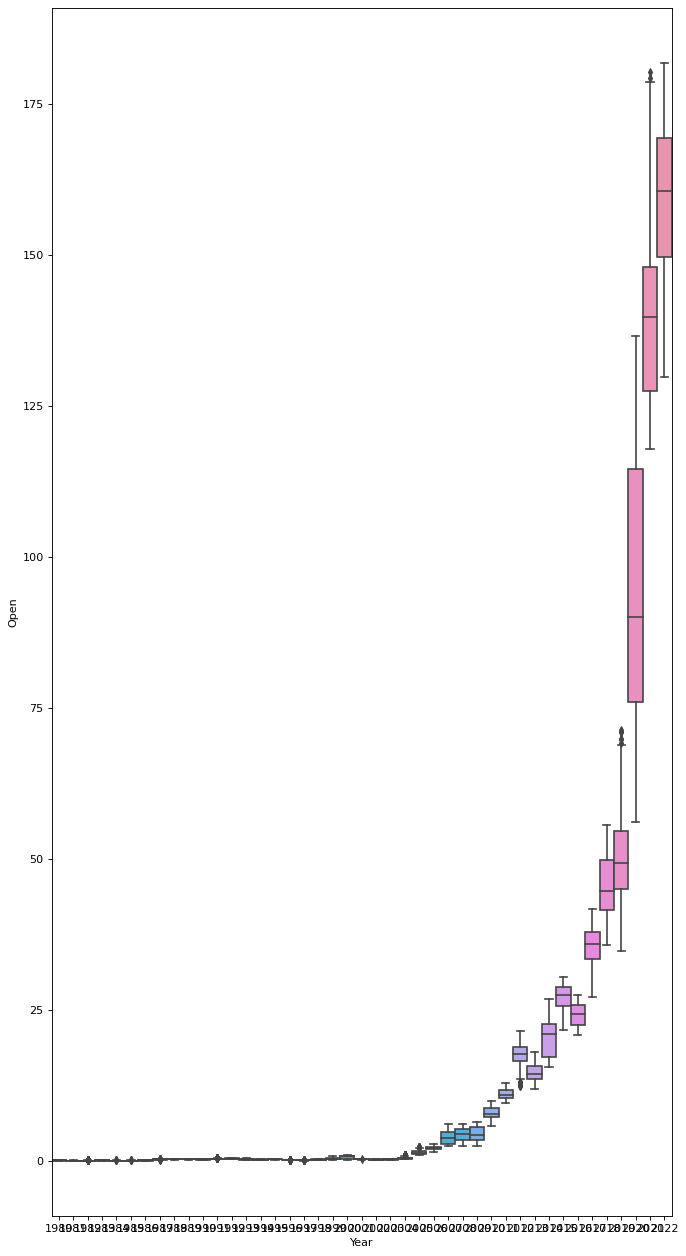

In [62]:
plt.figure(figsize=(10,20), dpi=80)
sns.boxplot(x='Year',y='Open',data = copy_data,width=1)


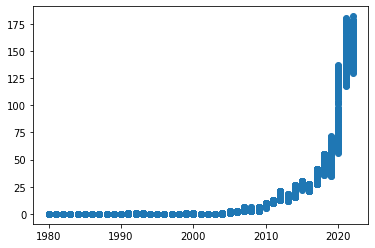

In [63]:
plt.scatter(x="Year",y="Open",data=copy_data)